# Machine Learning Prediction (Regression and Decision Tree Regressor) (3 of 3 documents)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import sklearn as sk
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', mpl.__version__)

%matplotlib inline

numpy version: 1.14.3
pandas version: 0.23.0
scikit-learn version: 0.19.1
matplotlib version: 2.2.2


In [3]:
df = pd.read_csv('datamonth.csv')
df['Month'] = df['Month'].map({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
df.head(5)

,Year,Month,Count of order_id,total_order_value
0,2016,12,1,19.62
1,2018,9,1,166.46
2,2016,9,6,562.78
3,2016,10,363,65170.48
4,2017,1,955,162206.06


In [4]:
df = df.sort_values(by=['Year', 'Month'], ascending=True)

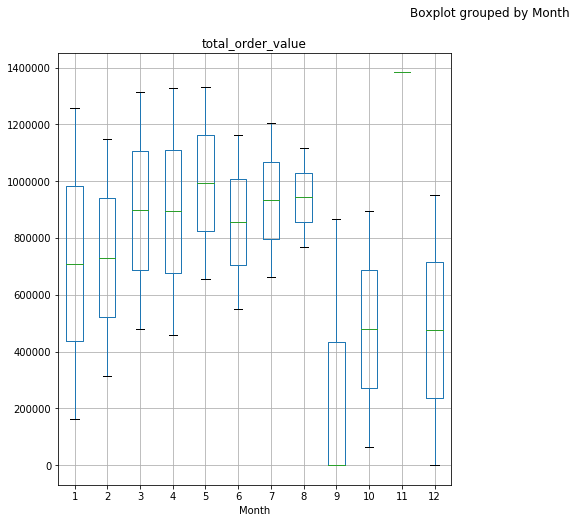

In [5]:
features1 = ('total_order_value')
df.boxplot(column=features1, by='Month', figsize=(15,8), layout=(1,2));

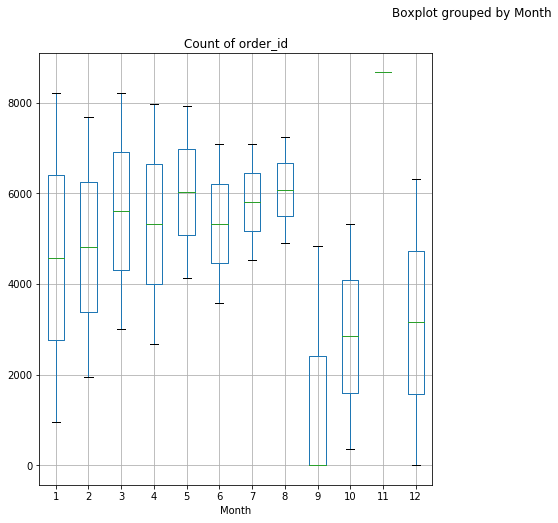

In [6]:
features2 = ('Count of order_id')
df.boxplot(column=features2, by='Month', figsize=(15,8), layout=(1,2));

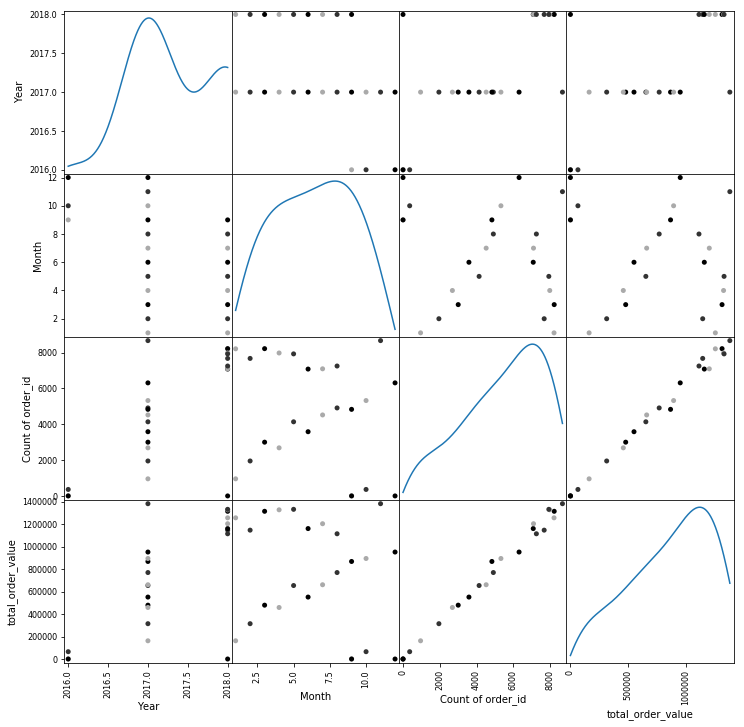

In [7]:
scatter_matrix(df, alpha=1, figsize=(12, 12), diagonal='kde', c=['#aaaaaa','#333333','#000000'], s=100, linewidth=0);

Text(0,0.5,'Revenue in BRL (Brasilian Real)')

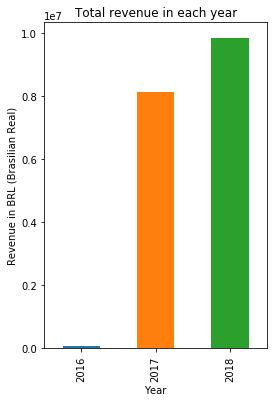

In [8]:
valuegraph1 = df.groupby('Year')['total_order_value'].sum()
valuegraph1fix = valuegraph1.plot(kind="bar", figsize = (4,6))
valuegraph1fix.set_title('Total revenue in each year')
valuegraph1fix.set_xlabel('Year')
valuegraph1fix.set_ylabel('Revenue in BRL (Brasilian Real)')

Text(0,0.5,'Number of Orders')

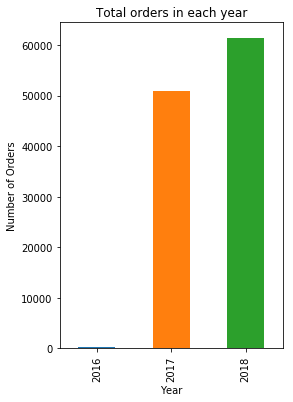

In [9]:
valuegraph12 = df.groupby('Year')['Count of order_id'].sum()
valuegraph12fix = valuegraph12.plot(kind="bar", figsize = (4,6))
valuegraph12fix.set_title('Total orders in each year')
valuegraph12fix.set_xlabel('Year')
valuegraph12fix.set_ylabel('Number of Orders')

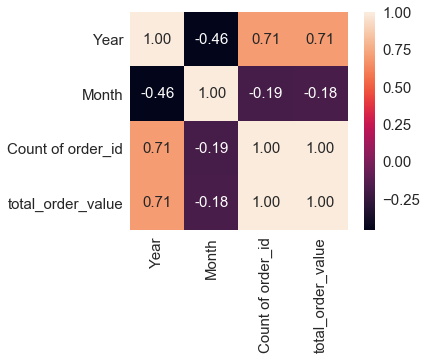

In [10]:
cols = ['Year', 'Month', 'Count of order_id', 'total_order_value']
cm = np.corrcoef(df[cols][np.isfinite(df['Month'])].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

## Separating Datatest and Datatrain - 2 Features (Month and Year)

In [11]:
Xv = df[['Year', 'Month']]
yv = df['total_order_value']

Xo = df[['Year', 'Month']]
yo = df['Count of order_id']

X_trainv, X_testv, y_trainv, y_testv = train_test_split(Xv, yv, test_size=0.2)
print('Train shape:', X_trainv.shape, y_trainv.shape)
print('Test shape:', X_testv.shape, y_testv.shape)

X_traino, X_testo, y_traino, y_testo = train_test_split(Xo, yo, test_size=0.2)
print('Train shape:', X_traino.shape, y_traino.shape)
print('Test shape:', X_testo.shape, y_testo.shape)

Train shape: (19, 2) (19,)
Test shape: (5, 2) (5,)
Train shape: (19, 2) (19,)
Test shape: (5, 2) (5,)


## Regression - Value

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
mdl = reg.fit(X_trainv, y_trainv)

In [13]:
predv = mdl.predict(X_testv)
print(predv)

[ 209045.02454436 1064702.67138875  786833.08709884  290840.97316206
 1173763.93621218]


In [14]:
r_squarev = mdl.score(X_testv, y_testv)
print("R2 error", r_squarev)

R2 error 0.8579390282524187


In [15]:
mse_v = mean_squared_error(y_testv, predv)
print("Mean Squared Error : ", mse_v)

Mean Squared Error :  45680267741.919075


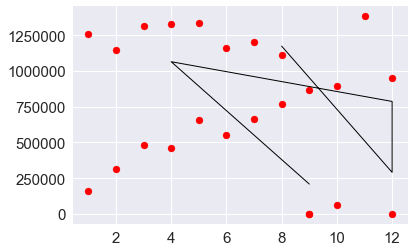

In [16]:
#Line MONTH fitted against raw data
plt.scatter(Xv['Month'], yv, color='r')
plt.plot(X_testv['Month'], predv, color='k', linewidth=1)
plt.show()

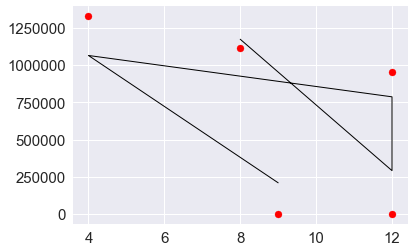

In [17]:
#Line MONTH fitted against data test
plt.scatter(X_testv['Month'], y_testv, color='r')
plt.plot(X_testv['Month'], predv, color='k', linewidth=1)
plt.show()

In [18]:
X_testv['Year']

2     2016
20    2018
14    2017
0     2016
15    2018
Name: Year, dtype: int64

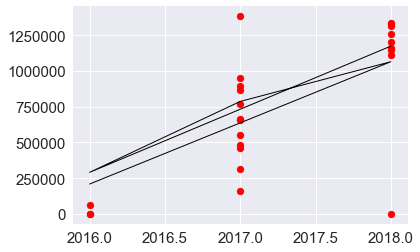

In [19]:
#Line YEAR fitted against raw data
plt.scatter(Xv['Year'], yv, color='r')
plt.plot(X_testv['Year'], predv, color='k', linewidth=1)
plt.show()

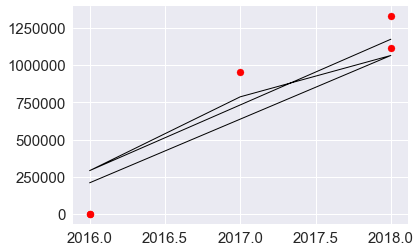

In [20]:
#Line YEAR fitted against data test
plt.scatter(X_testv['Year'], y_testv, color='r')
plt.plot(X_testv['Year'], predv, color='k', linewidth=1)
plt.show()

In [21]:
df_result2 = pd.DataFrame({'Actual':y_testv, 'Predicted':predv}) 
df_result2

,Actual,Predicted
2,562.78,2.090450e+05
20,1328309.64,1.064703e+06
14,952423.54,7.868331e+05
0,19.62,2.908410e+05
15,1115022.12,1.173764e+06


In [22]:
#We can't produce scatter and linear graph precisely since our data is continous

## Regression - Orders 

In [23]:
from sklearn.linear_model import LinearRegression
reg2 = LinearRegression()
mdl2 = reg2.fit(X_traino, y_traino)

In [24]:
predo = mdl2.predict(X_testo)
print(predo)

[4090.34608231 1474.24769898 4059.95412275 7162.32385903 4303.08979923]


In [25]:
r_squareo = mdl2.score(X_testo, y_testo)
print(r_squareo)

0.5149035648357574


In [26]:
mse_o = mean_squared_error(y_testo, predo)
print("Mean Squared Error : ", mse_o)

Mean Squared Error :  3334327.0344187915


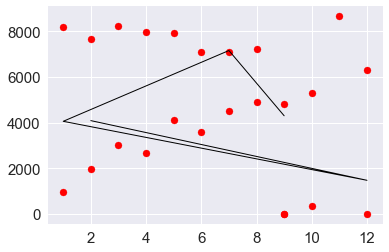

In [27]:
#Line MONTH fitted against raw data
plt.scatter(Xo['Month'], yo, color='r')
plt.plot(X_testo['Month'], predo, color='k', linewidth=1)
plt.show()

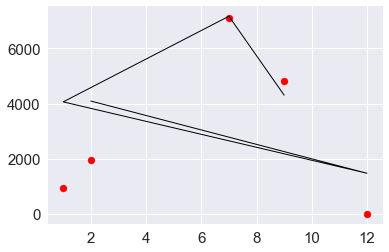

In [28]:
#Line MONTH fitted against data test
plt.scatter(X_testo['Month'], y_testo, color='r')
plt.plot(X_testo['Month'], predo, color='k', linewidth=1)
plt.show()

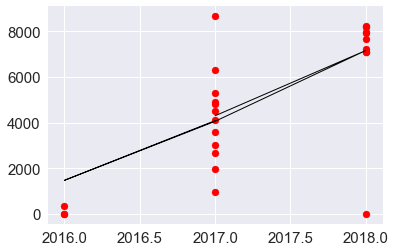

In [29]:
#line YEAR fitted against raw data
plt.scatter(Xo['Year'], yo, color='r')
plt.plot(X_testo['Year'], predo, color='k', linewidth=1)
plt.show()

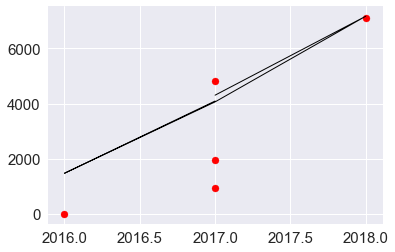

In [30]:
#line YEAR fitted against data test
plt.scatter(X_testo['Year'], y_testo, color='r')
plt.plot(X_testo['Year'], predo, color='k', linewidth=1)
plt.show()

In [31]:
df_result = pd.DataFrame({'Actual':y_testo, 'Predicted':predo}) 
df_result

,Actual,Predicted
5,1951,4090.346082
0,1,1474.247699
4,955,4059.954123
16,7092,7162.323859
12,4831,4303.089799


In [32]:
#We can't produce scatter and linear graph precisely since we use two features here

SINCE OUR DATA is continous, not discrete, then our research will be correlated with Regression

## Decision Tree Regressor - Value

In [33]:
from sklearn import tree
from sklearn.metrics import accuracy_score

clfv = tree.DecisionTreeRegressor(max_depth=2)
clfv2 = tree.DecisionTreeRegressor(max_depth=5)
modelclfv = clfv.fit(X_trainv, y_trainv)
modelclfv2 = clfv2.fit(X_trainv, y_trainv)

predv2 = modelclfv.predict(X_testv)
predv21 = modelclfv2.predict(X_testv)
print(predv2)
print(predv21)

[ 534575.2  1236323.16 1382776.09 1382776.09 1236323.16]
[  65170.48 1315140.71 1382776.09 1382776.09 1204545.35]


In [34]:
dfclfv = pd.DataFrame({'Actual':y_testv, 'Predicted':predv2}) 
dfclfv

,Actual,Predicted
2,562.78,534575.20
20,1328309.64,1236323.16
14,952423.54,1382776.09
0,19.62,1382776.09
15,1115022.12,1236323.16


In [35]:
dfclfv2 = pd.DataFrame({'Actual':y_testv, 'Predicted':predv21}) 
dfclfv2

,Actual,Predicted
2,562.78,65170.48
20,1328309.64,1315140.71
14,952423.54,1382776.09
0,19.62,1382776.09
15,1115022.12,1204545.35


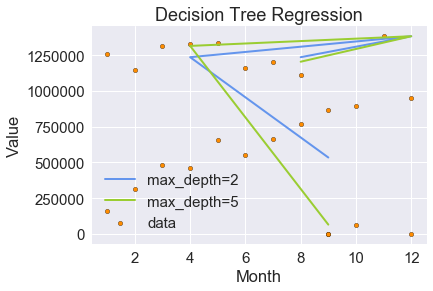

In [36]:
plt.figure()
plt.scatter(Xv['Month'], yv, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_testv['Month'], predv2, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_testv['Month'], predv21, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Value")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

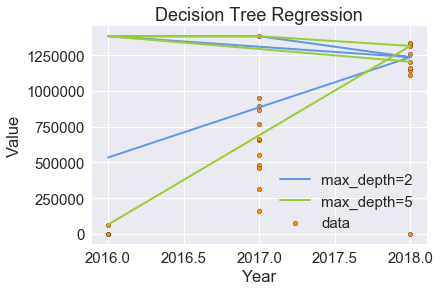

In [37]:
plt.figure()
plt.scatter(Xv['Year'], yv, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_testv['Year'], predv2, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_testv['Year'], predv21, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## Cross Validation 

In [40]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    kf = KFold(K, shuffle=True, random_state=0)
    
    scores = cross_val_score(clf, X, y, cv=kf)
    
    print(scores)
    print(("Mean score : {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_validation(modelclfv2, X_trainv, y_trainv, 5)

[-4.66992695  0.17649912  0.49451587 -0.24809337 -1.4338174 ]
Mean score : -1.136 (+/-0.942)


## Decision Tree - Orders 

In [41]:
from sklearn import tree

clfo = tree.DecisionTreeRegressor(max_depth=2)
clfo2 = tree.DecisionTreeRegressor(max_depth=5)
modelclfo = clfo.fit(X_traino, y_traino)
modelclfo2 = clfo2.fit(X_traino, y_traino)

predo2 = modelclfo.predict(X_testo)
predo21 = modelclfo2.predict(X_testo)
print(predo2)
print(predo21)

[4791.88888889  363.         4791.88888889 6790.5        4791.88888889]
[2842.   363.  2842.  7078.  4714.5]


In [42]:
dfclfo = pd.DataFrame({'Actual':y_testo, 'Predicted':predo2}) 
dfclfo

,Actual,Predicted
5,1951,4791.888889
0,1,363.000000
4,955,4791.888889
16,7092,6790.500000
12,4831,4791.888889


In [43]:
dfclfo2 = pd.DataFrame({'Actual':y_testo, 'Predicted':predo21}) 
dfclfo2

,Actual,Predicted
5,1951,2842.0
0,1,363.0
4,955,2842.0
16,7092,7078.0
12,4831,4714.5


Of course as you can see, the deeper then better and more variety the result is

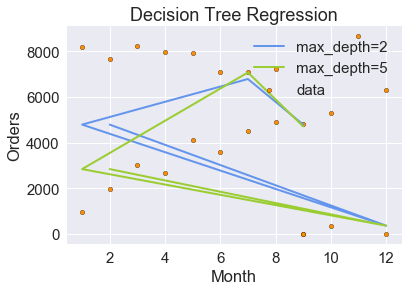

In [44]:
plt.figure()
plt.scatter(Xo['Month'], yo, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_testo['Month'], predo2, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_testo['Month'], predo21, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Month")
plt.ylabel("Orders")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

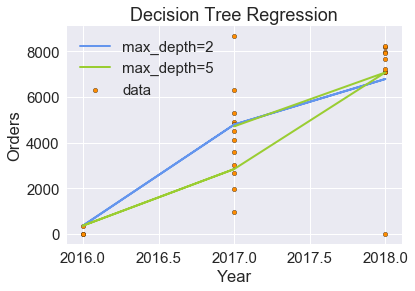

In [45]:
plt.figure()
plt.scatter(Xo['Year'], yo, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_testo['Year'], predo2, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_testo['Year'], predo21, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Orders")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [59]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    kf = KFold(K, shuffle=True, random_state=0)
    
    scores = cross_val_score(clf, X, y, cv=kf)
    
    print(scores)
    print(("Mean score : {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
    
evaluate_cross_validation(modelclfo, X_traino, y_traino, 5)

[ 0.23296145  0.5535857   0.66408664 -0.82604348  0.19070507]
Mean score : 0.163 (+/-0.263)


## Let's predict on January 2019

In [ ]:
#Order - Linear Regression & DTG
polj19 = mdl2.predict([[2019, 1]])
podj19 = modelclfo2.predict([[2019, 1]])

#Value - LR & DTG
volj19 = mdl.predict([[2019, 1]])
vodj19 = modelclfv2.predict([[2019, 1]])

print("Orders in January 2019, Linear Regression : ", polj19)
print("Orders in January 2019, Decision Tree Regressor : ", podj19)
print("#############################################################")
print("Revenues in January 2019, Linear Regression in Brassilians Real : ", volj19)
print("Revenues in January 2019, Decision Tree Regressor in Brassilians Real : ", vodj19)